In [37]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


### Introducing Principal Component Analysis

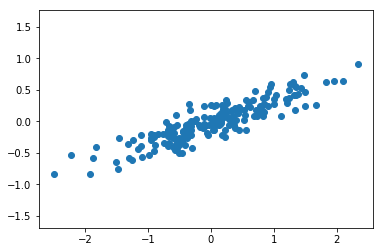

In [38]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2,2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [39]:
# finding the prinipal axis
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [40]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [41]:
print(pca.explained_variance_)

[ 0.75871884  0.01838551]


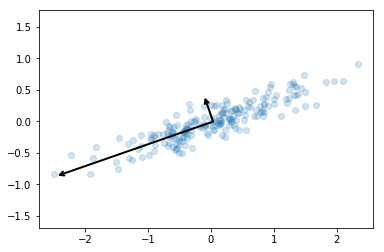

In [42]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                   linewidth=2,
                   shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
    
# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector *3* np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [43]:
list(zip(pca.explained_variance_, pca.components_))

[(0.75871884337819839, array([-0.94446029, -0.32862557])),
 (0.018385506035994762, array([-0.32862557,  0.94446029]))]

#### PCA as dimensionality reduction

In [48]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape: ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:  (200, 2)
transformed shape: (200, 1)


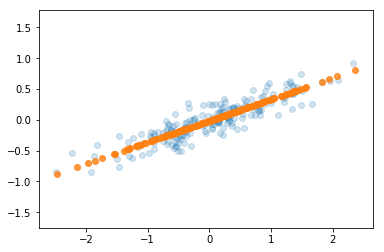

In [49]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

#### PCA for visualization: Handwritten digits

In [10]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape  # 8x8 pixels for each image

(1797, 64)

In [11]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


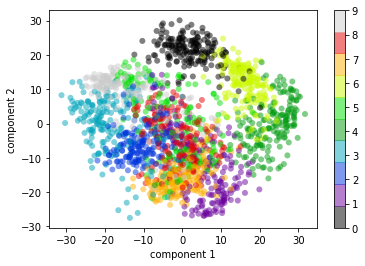

In [12]:
plt.scatter(projected[:, 0], projected[:, 1],
           c=digits.target, edgecolor='none', alpha=0.5,
           cmap=plt.cm.get_cmap('nipy_spectral', 10));

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

#### what do this components mean?
Think of this as the components that explain the variance in the data (eigen vector-value stuff).  

#### Choosing the number of components

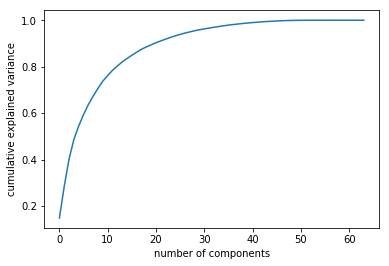

In [13]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

### PCA as Noise Filtering
The idea is this: any components
with variance much larger than the effect of the noise should be relatively
unaffected by the noise. So if you reconstruct the data using just the largest subset of principal components, you should be preferentially keeping the signal and throwing out the noise.

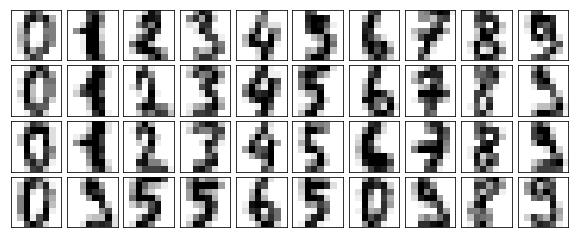

In [14]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                            subplot_kw={'xticks':[], 'yticks':[]},
                            gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),
                 interpolation='nearest',cmap='binary', 
                 clim=(0, 16))

plot_digits(digits.data)


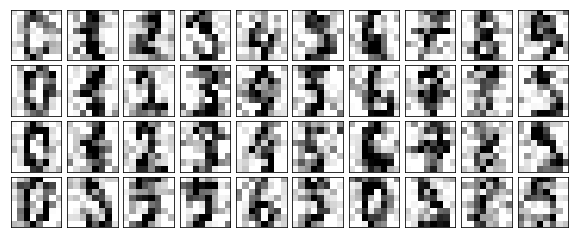

In [15]:
# adding some noise
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [16]:
pca = PCA(0.50).fit(noisy)
(pca.n_components, pca.n_components_)

(0.5, 12)

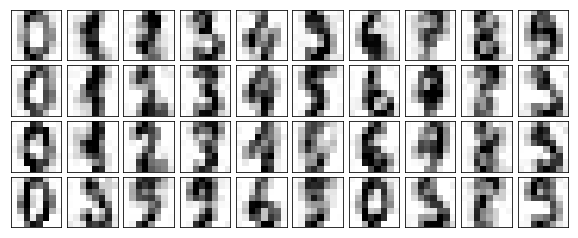

In [17]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

### Example: Eigenfaces

In [20]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


*Randomized PCA is a little faster than the standard PCA, so it is useful for high dimension datasets*

In [51]:
from sklearn.decomposition import PCA
pca = PCA(150, svd_solver='randomized' )
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=False)

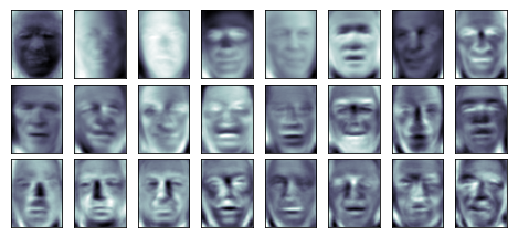

In [52]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

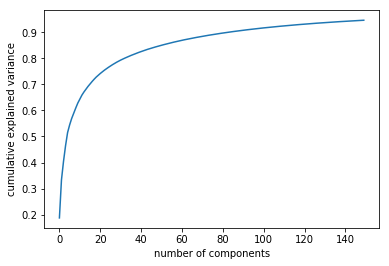

In [57]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

So we see 150 components will expalain about 90% of the variance

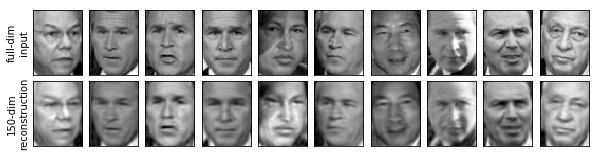

In [60]:
# comparing with full dimension image
pca = PCA(150, svd_solver='randomized').fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)
fig, ax = plt.subplots(2,10, figsize=(10, 2.5),
                      subplot_kw={'xticks':[], 'yticks':[]},
                    gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');